# СБОРНЫЙ ПРОЕКТ №1 по определению факторов успешности игр и закономерностей между ними
Предоставлены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

    Описание данных:
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



## Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первом этапе импортируются необходимые библиотеки, далее выводятся первые пять строк таблицы, после - общая информация, из которой становится понятно, что в столбцах name, genre, critic_score, user_score & rating есть пропущенные значения. Представлено всего два типа данных - строки и вещественные числа, но в столбцах year_of_release & user_score типы данных неверные и нуждаются в изменении.

## Предобработка данных

In [3]:
#df.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns = df.columns.str.lower()
display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df['year_of_release'] = df['year_of_release'].astype("Int32")
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


Рейтинг - категориальный столбец, замена происходит на "tbd" (=to be determined, to be done), так как мы не знаем, какую именно категорию присвоить пропущенным значениям, чтобы не исказить результаты исследований.

In [5]:
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [6]:
df = df.dropna(subset=['name'])
print(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


In [7]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [8]:
df['critic_score'].fillna(-1, inplace=True)
df['user_score'].fillna(-1, inplace=True)
df['rating'].fillna('tbd', inplace=True)
print(df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [9]:
# явные дубликаты
explicit_duplicates = df[df.duplicated()]

# неявные дубликаты
implicit_duplicates = df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

print("Явные дубликаты:")
print(explicit_duplicates)

print("\nНеявные дубликаты:")
print(implicit_duplicates)


Явные дубликаты:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Неявные дубликаты:
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E  


In [10]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True, keep='first')

Согласно результатам, полученных при проверке на явные дубликаты, таковых в данных не имеется. Неявные дубликаты были обнаружены и удалены.

In [11]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,tbd,31.38


На этапе предобработки сначала было изменено название всех столбцов, они приведены к строчным буквам. Далее были удалены 2 пропуска (2 из 16715 значений: Раскольников бы сказал, что имеем право) из столбца с названиями, что повлекло за собой исчезновение пропусков в столбце с жанрами, => пропуски были в одинаковых строках. Пропуски в столбце с годом выпуска игр были заменены на 0, чтобы сохранить другие данные из этих строк, а пропуски в столбцах с пользовательской оценкой и оценкой критиков были заменены на -1, чтобы при дальнейших вычислениях пропуски не оказывали влияния на результат (что год выпуска не может быть равен 0, что ни одна оценка не может быть равна -1). Пропуски в столбце с рейтингом заменены на "tbd" (=to be determined, to be done): по какой-то причине рейтинг не определен (возможно, будет определен позже). Изменены типы данных в столбцах с годом (на целочисленные значения, потому что год - не вещественное число) и в столбце с пользовательской оценкой (на вещественные значения, для возможности в дальнейшем проводить вычисления) на корректные, добавлен столбец с продажами по всему миру. Проведена проверка на янвые и неявные дубликаты.

 ## Исследовательский анализ данных

### Выпуск игр по годам

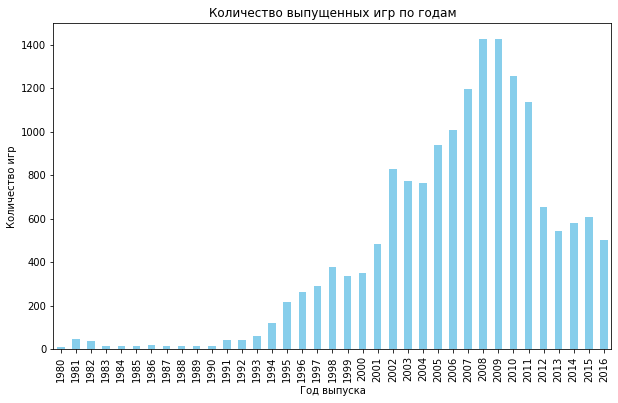

In [12]:
games_by_year = df.groupby('year_of_release')['name'].count().sort_index()

plt.figure(figsize=(10, 6))
games_by_year.plot(kind='bar', color='skyblue')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Рост выпуска видеоигр начался с 1995 года, что объясняется историей этой индустрии. Период, в котором производилось наибольшее количество игр, - 2007-2011 годы, после чего до 2016 наблюдался спад. Данные за все периоды не очень репрезентативны в связи с тем, что индустрия видеоигр подвергается влиянию множества факторовя, ключевым из которых является спрос потребителей на рынке.

### Определение актуального периода для анализа

In [13]:
temp = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
        .sort_values(by='year_of_release')
       )
display(temp)

,year_of_release
platform,
GG,1
PCFX,1
TG16,1
3DO,2
SCD,2
WS,3
NG,4
PS4,4
XOne,4


In [14]:
temp.year_of_release.describe() 

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

В среднем игровые платформы существуют 7 лет.  Для дальнейшего анализа выберем период за последние 3 года (2012-2016), так как именно он будет отражать данные для проведения качественного анализа: в нем окажутся платформы, которые только начали продажи и которые уже просущестовавали на рынке сколько-то лет, но при этом на момент 2016 года они не находятся "на последнем издыхании" и еще играют немалую роль в исследовании.

### Изменение продаж по платформам

In [15]:
df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)].reset_index()

top_5_platforms = df.pivot_table(index='platform', values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
display(top_5_platforms.head())

,platform,global_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


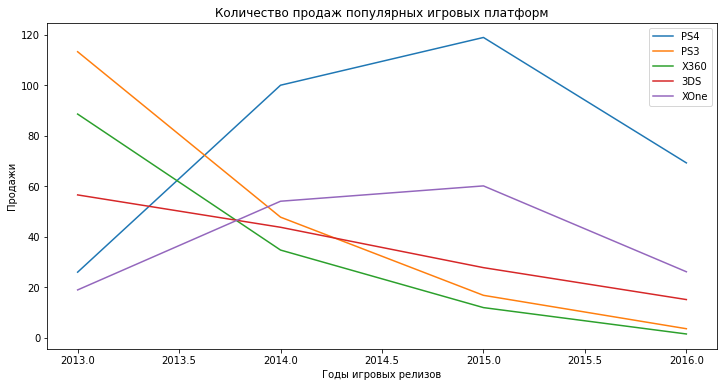

In [16]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2012)]
    total = slicee.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['global_sales'], label=i)
    plt.legend()

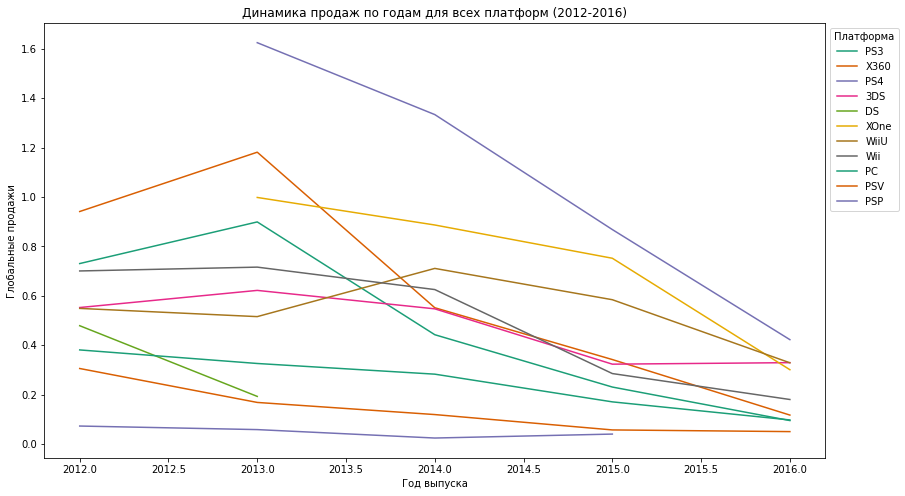

In [17]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_of_release', y='global_sales', hue='platform', data=df, ci=None, palette="Dark2")
plt.title('Динамика продаж по годам для всех платформ (2012-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи')
plt.legend(title='Платформа', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Платформы с наибольшими суммарными продажами: XOne, PS3, 3DS, DS, PS4, а распределение продаж по годам изображено на графиках выше.

In [18]:
list_of_top5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_top_5_platforms = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS'])]

df_top_5_platforms['global_sales'].describe()

count    869.000000
mean       0.659655
std        1.537116
min        0.010000
25%        0.060000
50%        0.220000
75%        0.680000
max       21.050000
Name: global_sales, dtype: float64

Исходя из полученных значений, можно седлать вывод, что даже среди самых популярных платформ, у которых наибольшие продажи, происходит спад количества проданных видеоигр: то же самое и подтверждает график распределние продаж по годам выше.

### Глобальные продажи игр в разбивке по платформам

Text(0, 0.5, 'Глобальные продажи')

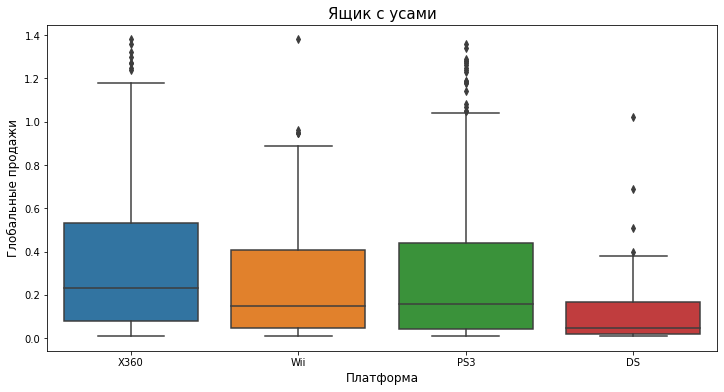

In [19]:
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['global_sales'] < 1.4]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='global_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Наибольшее медианное значение продаж в мире у платформы PS3, далее по убыванию идут X360, Wii, PS2 & DS. Если смотреть "размеры" "ящиков с усами", то получается такой же "рейтинг".

### Влияние отзывов пользователей и критиков на продажи внутри платформ

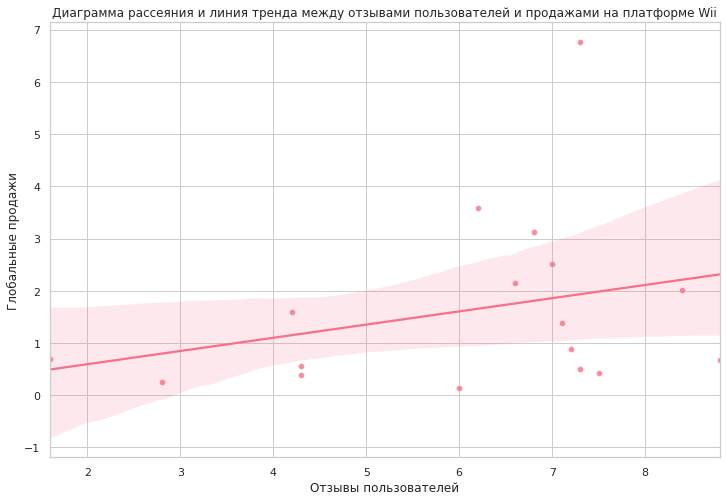

Корреляция между отзывами пользователей и продажами на платформе Wii: 0.29619680007479526


In [20]:
wii_data = df[df['platform'] == 'Wii']

filtered_wii_data = wii_data[wii_data['user_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='user_score', y='global_sales', data=filtered_wii_data, alpha=0.8)
sns.regplot(x='user_score', y='global_sales', data=filtered_wii_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами пользователей и продажами на платформе Wii')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_wii_data['user_score'].corr(filtered_wii_data['global_sales'])
print(f"Корреляция между отзывами пользователей и продажами на платформе Wii: {correlation}")

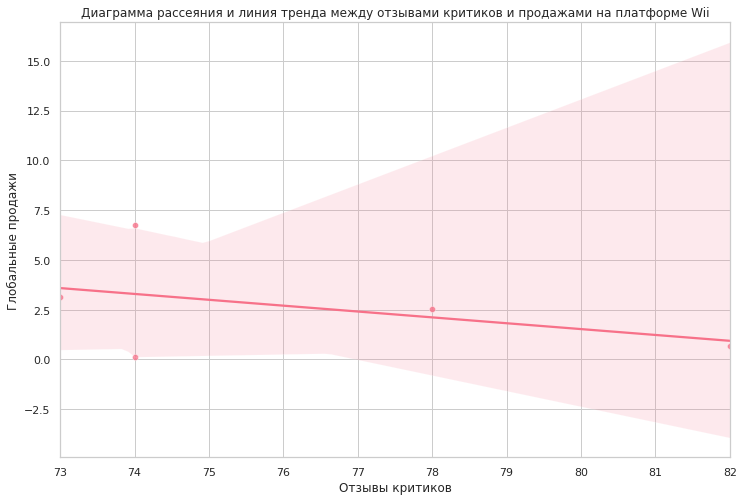

Корреляция между отзывами критиков и продажами на платформе Wii: -0.4243413011077494


In [21]:
wii_data = df[df['platform'] == 'Wii']

filtered_wii_data = wii_data[wii_data['critic_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='critic_score', y='global_sales', data=filtered_wii_data, alpha=0.8)
sns.regplot(x='critic_score', y='global_sales', data=filtered_wii_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами критиков и продажами на платформе Wii')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_wii_data['critic_score'].corr(filtered_wii_data['global_sales'])
print(f"Корреляция между отзывами критиков и продажами на платформе Wii: {correlation}")

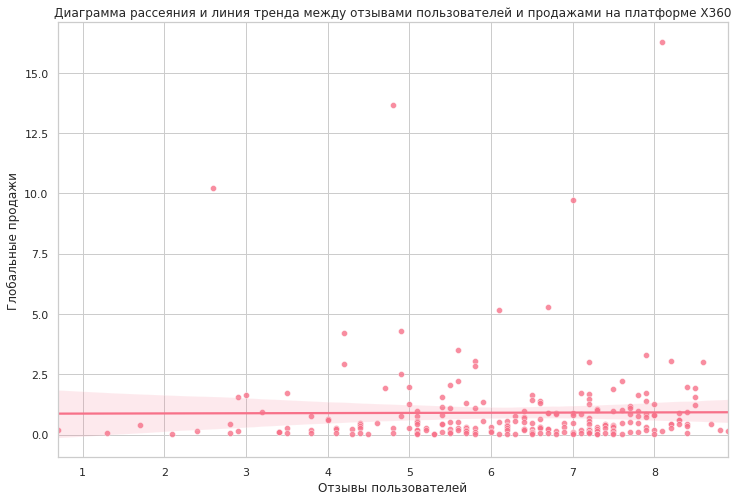

Корреляция между отзывами пользователей и продажами на платформе X360: 0.006163978646213326


In [22]:
x360_data = df[df['platform'] == 'X360']

filtered_x360_data = x360_data[x360_data['user_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='user_score', y='global_sales', data=filtered_x360_data, alpha=0.8)
sns.regplot(x='user_score', y='global_sales', data=filtered_x360_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами пользователей и продажами на платформе X360')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_x360_data['user_score'].corr(filtered_x360_data['global_sales'])
print(f"Корреляция между отзывами пользователей и продажами на платформе X360: {correlation}")

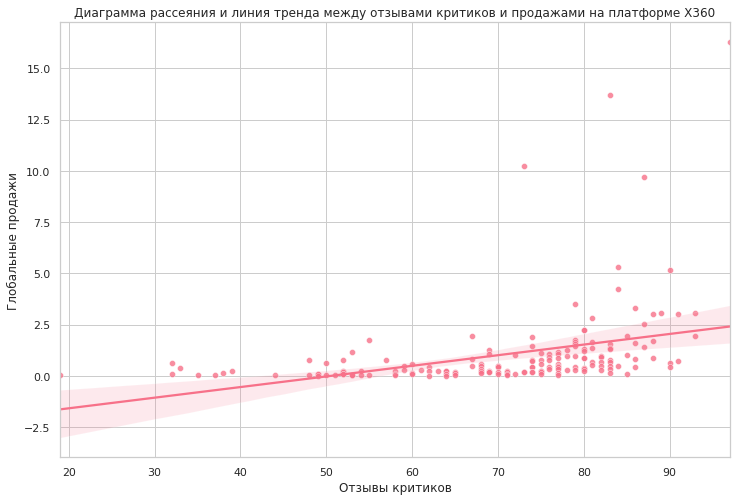

Корреляция между отзывами критиков и продажами на платформе X360: 0.3605734888507336


In [23]:
x360_data = df[df['platform'] == 'X360']

filtered_x360_data = x360_data[x360_data['critic_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='critic_score', y='global_sales', data=filtered_x360_data, alpha=0.8)
sns.regplot(x='critic_score', y='global_sales', data=filtered_x360_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами критиков и продажами на платформе X360')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_x360_data['critic_score'].corr(filtered_x360_data['global_sales'])
print(f"Корреляция между отзывами критиков и продажами на платформе X360: {correlation}")

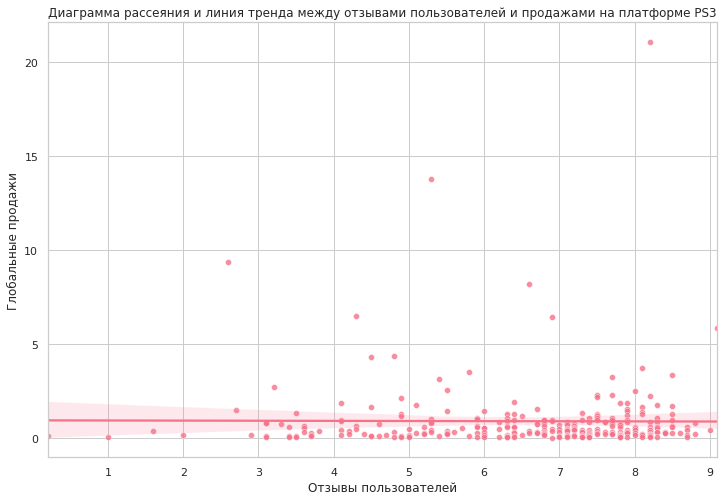

Корреляция между отзывами пользователей и продажами на платформе PS3: -0.006205767686051523


In [24]:
ps3_data = df[df['platform'] == 'PS3']

filtered_ps3_data = ps3_data[ps3_data['user_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='user_score', y='global_sales', data=filtered_ps3_data, alpha=0.8)
sns.regplot(x='user_score', y='global_sales', data=filtered_ps3_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами пользователей и продажами на платформе PS3')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ps3_data['user_score'].corr(filtered_ps3_data['global_sales'])
print(f"Корреляция между отзывами пользователей и продажами на платформе PS3: {correlation}")

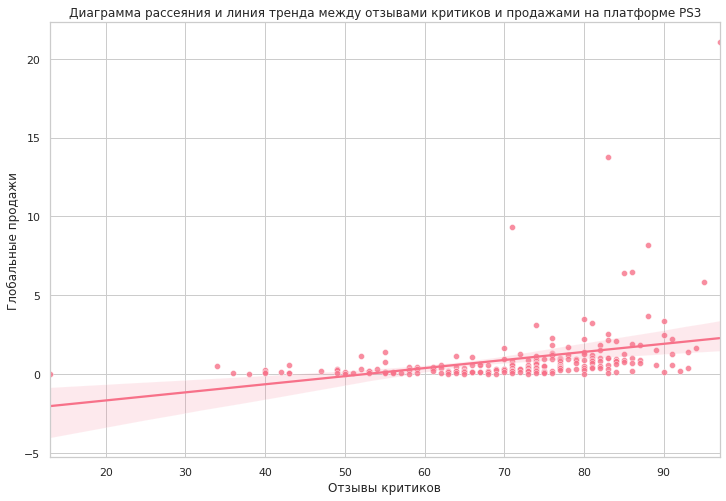

Корреляция между отзывами критиков и продажами на платформе PS3: 0.3341517575509856


In [25]:
ps3_data = df[df['platform'] == 'PS3']

filtered_ps3_data = ps3_data[ps3_data['critic_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='critic_score', y='global_sales', data=filtered_ps3_data, alpha=0.8)
sns.regplot(x='critic_score', y='global_sales', data=filtered_ps3_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами критиков и продажами на платформе PS3')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ps3_data['critic_score'].corr(filtered_ps3_data['global_sales'])
print(f"Корреляция между отзывами критиков и продажами на платформе PS3: {correlation}")

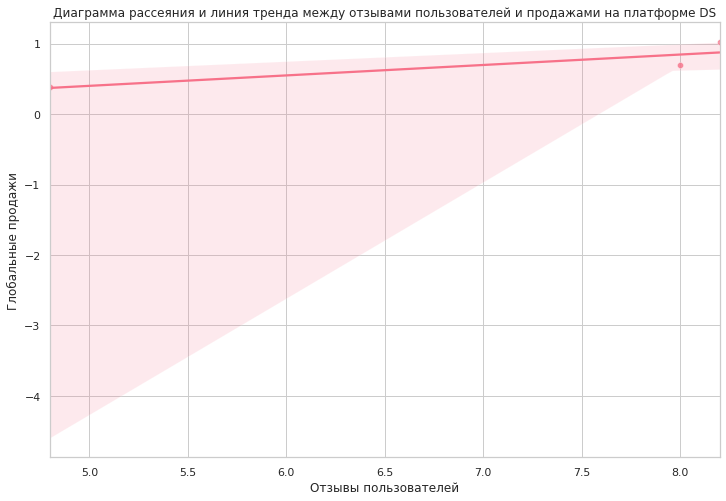

Корреляция между отзывами пользователей и продажами на платформе DS: 0.88270872757644


In [26]:
ds_data = df[df['platform'] == 'DS']

filtered_ds_data = ds_data[ds_data['user_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='user_score', y='global_sales', data=filtered_ds_data, alpha=0.8)
sns.regplot(x='user_score', y='global_sales', data=filtered_ds_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами пользователей и продажами на платформе DS')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ds_data['user_score'].corr(filtered_ds_data['global_sales'])
print(f"Корреляция между отзывами пользователей и продажами на платформе DS: {correlation}")

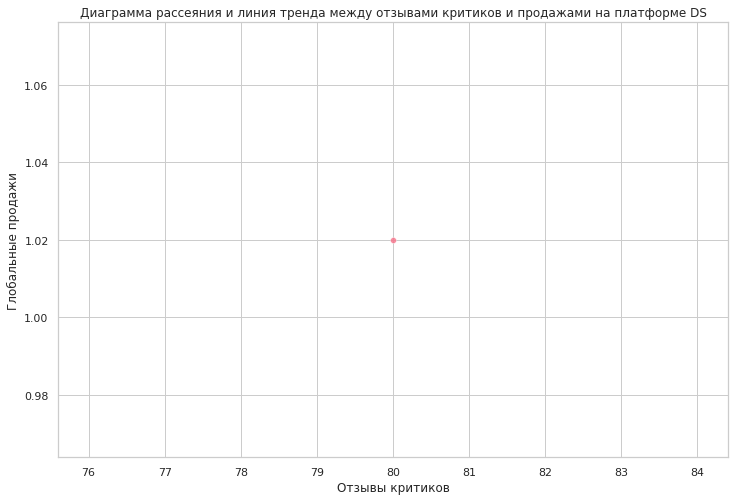

Корреляция между отзывами критиков и продажами на платформе DS: nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [27]:
ds_data = df[df['platform'] == 'DS']

filtered_ds_data = ds_data[ds_data['critic_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='critic_score', y='global_sales', data=filtered_ds_data, alpha=0.8)
sns.regplot(x='critic_score', y='global_sales', data=filtered_ds_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами критиков и продажами на платформе DS')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ds_data['critic_score'].corr(filtered_ds_data['global_sales'])
print(f"Корреляция между отзывами критиков и продажами на платформе DS: {correlation}")

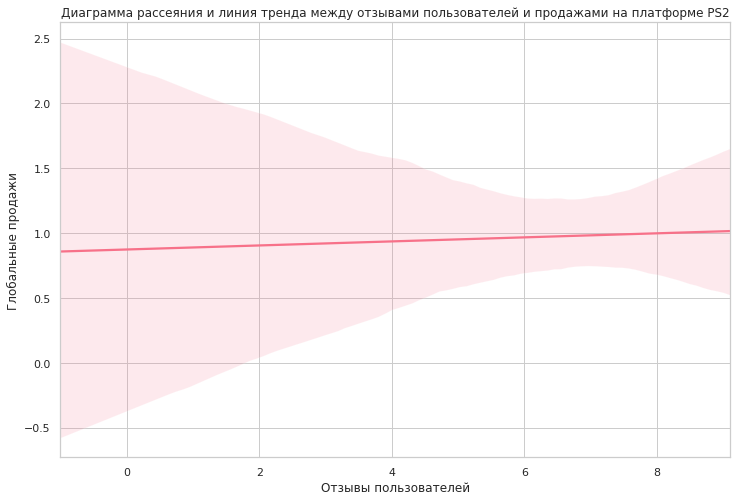

Корреляция между отзывами пользователей и продажами на платформе PS2: nan


In [28]:
ps2_data = df[df['platform'] == 'PS2']

filtered_ps2_data = ps2_data[ps2_data['user_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='user_score', y='global_sales', data=filtered_ps2_data, alpha=0.8)
sns.regplot(x='user_score', y='global_sales', data=filtered_ps3_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами пользователей и продажами на платформе PS2')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ps2_data['user_score'].corr(filtered_ps2_data['global_sales'])
print(f"Корреляция между отзывами пользователей и продажами на платформе PS2: {correlation}")

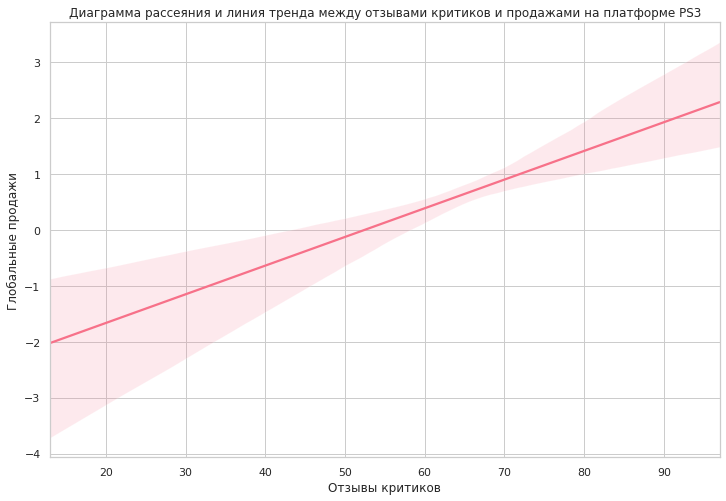

Корреляция между отзывами критиков и продажами на платформе PS2: nan


In [29]:
ps2_data = df[df['platform'] == 'PS2']

filtered_ps2_data = ps2_data[ps2_data['critic_score'] != -1]

sns.set(style="whitegrid", palette="husl")

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='critic_score', y='global_sales', data=filtered_ps2_data, alpha=0.8)
sns.regplot(x='critic_score', y='global_sales', data=filtered_ps3_data, scatter=False, ax=scatter_plot)
plt.title('Диаграмма рассеяния и линия тренда между отзывами критиков и продажами на платформе PS3')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи')
plt.show()

correlation = filtered_ps2_data['critic_score'].corr(filtered_ps2_data['global_sales'])
print(f"Корреляция между отзывами критиков и продажами на платформе PS2: {correlation}")

Анализируя полученные результаты, можно сделать следующие выводы: 1) корреляция между отзывами пользователей и продажами игр на платформе не превышает значение в 0.18, что говорит о слабой линейной зависимости между рассматриваемыми параметрами; 2) корреляция между отзывами критиков и продажами игр на платформе не превышает значение в 0.43 и не опускается ниже 0.18, что говорит о средней линейной зависимости между рассматриваемыми параметрами, а также о том, что взаимосвязь отзывов критиков и продаж игр на платформе зависит непосредственно от самой платформы.

### Общее распределение игр по жанрам

In [30]:
distr_genre = df.pivot_table(
    index='genre', values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
display(distr_genre)

,genre,global_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.06
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


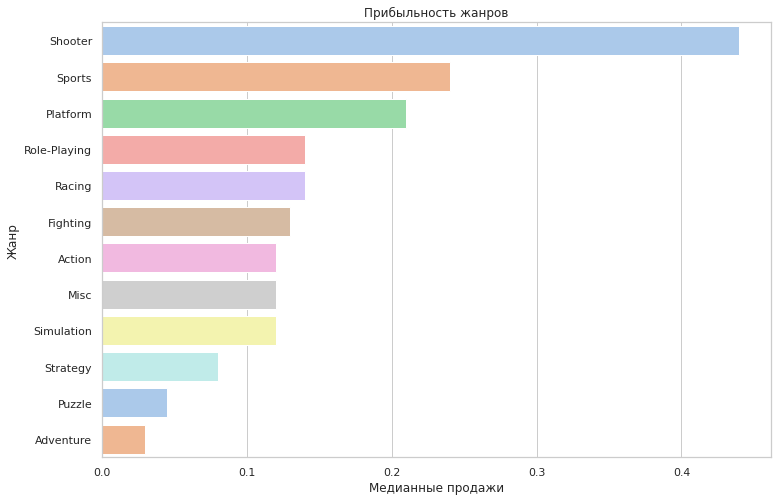

In [31]:
genre_median_sales = df.groupby('genre')['global_sales'].median().sort_values(ascending=False)
genre_game_counts = df.groupby('genre')['name'].count().sort_values(ascending=False)
genre_info = pd.DataFrame({'median_sales': genre_median_sales, 'game_counts': genre_game_counts})
genre_info = genre_info.sort_values(by='median_sales', ascending=False)

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=genre_info['median_sales'].values, y=genre_info.index, palette="pastel")
bar_plot.set(xlabel='Медианные продажи', ylabel='Жанр', title='Прибыльность жанров')
plt.show()


Всего в таблице представлено 11 различных жанров, среди которых самым продаваемым из расчета медианного значения продаж является "Shooter", а самым не популярным среди пользователей - "Adventure". Довольно хорошо продаются такие жанры, как "Platform" и "Sports", а средние продажи у "Fighting" и "Racing".

## Портрет пользователя каждого региона

### Самые популярные платформы

In [33]:
stat_df_platform = df.pivot_table(['na_sales','eu_sales','jp_sales'], ['platform'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

def func(row):
    row.eu_sales = round(row.eu_sales/row.global_sales, 2)
    row.jp_sales = round(row.jp_sales/row.global_sales, 2)
    row.na_sales = round(row.na_sales/row.global_sales, 2)
    return row

display(stat_df_platform.head())

,eu_sales,jp_sales,na_sales
platform,,,
X360,74.52,1.57,140.05
PS4,141.09,15.96,108.74
PS3,106.85,35.29,103.38
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31


In [34]:
# fig, axis = plt.subplots(2,2, figsize=(18,7))

# stat_df_platform['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0]).set(ylabel='eu_sales')
# stat_df_platform['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1]).set(ylabel='na_sales')
# stat_df_platform['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0]).set(ylabel='jp_sales')

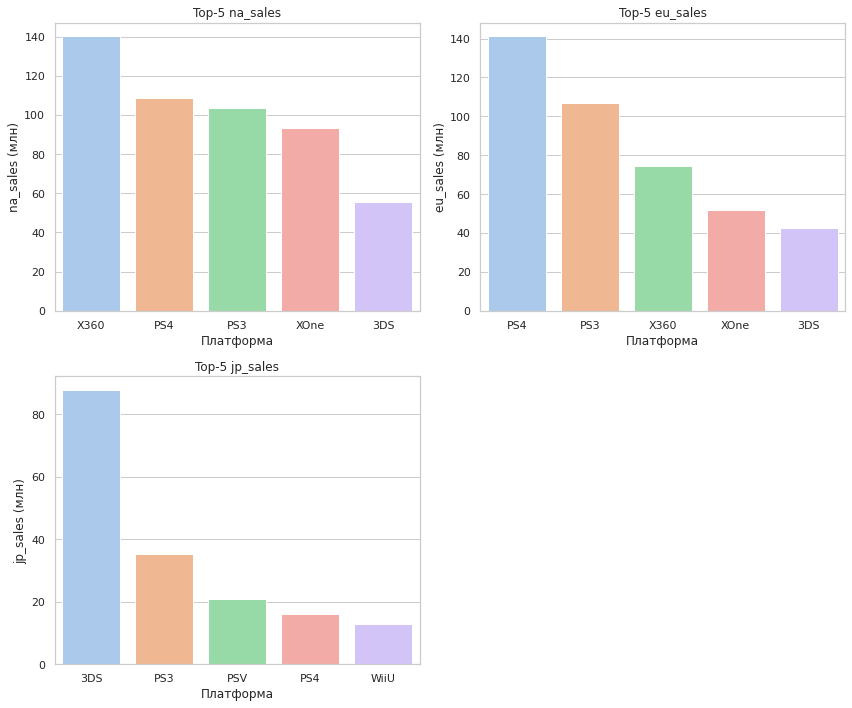

In [35]:

regions = ['na_sales', 'eu_sales', 'jp_sales']


plt.figure(figsize=(12, 10))

for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    
    top_platforms = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

    sns.set(style="whitegrid", palette="pastel")
    
    bar_plot = sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="pastel")

    plt.title(f'Top-5 {region}')
    plt.xlabel('Платформа')
    plt.ylabel(f'{region} (млн)')

plt.tight_layout()
plt.show()


Самыми популярными платформами для пользователей Европейского союза являются PS3, X360, PS4, Wii, DS (по убыванию);
Самыми популярными платформами для пользователей Северной Америки являются X360, PS3, Wii, DS, PS4 (по убыванию);
Самыми популярными платформами для пользователей Японии являются 3DS, PS3, DS, PSP, Wii (по убыванию).
Во всех случаях первая платформа имеет огромный отрыв от второй

### Самые популярные жанры

<!-- На круговых диаграммах выше представлено распределение продаж на самых популярных платформах по регионам -->

In [37]:
stat_df_genre = df.pivot_table(['na_sales','eu_sales','jp_sales'], ['genre'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(stat_df_genre)

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Shooter,113.47,9.23,144.77
Sports,69.08,8.01,81.53
Role-Playing,48.53,65.44,64.00
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Fighting,10.79,9.44,19.79
Racing,27.29,2.50,17.22
Adventure,9.46,8.24,8.92


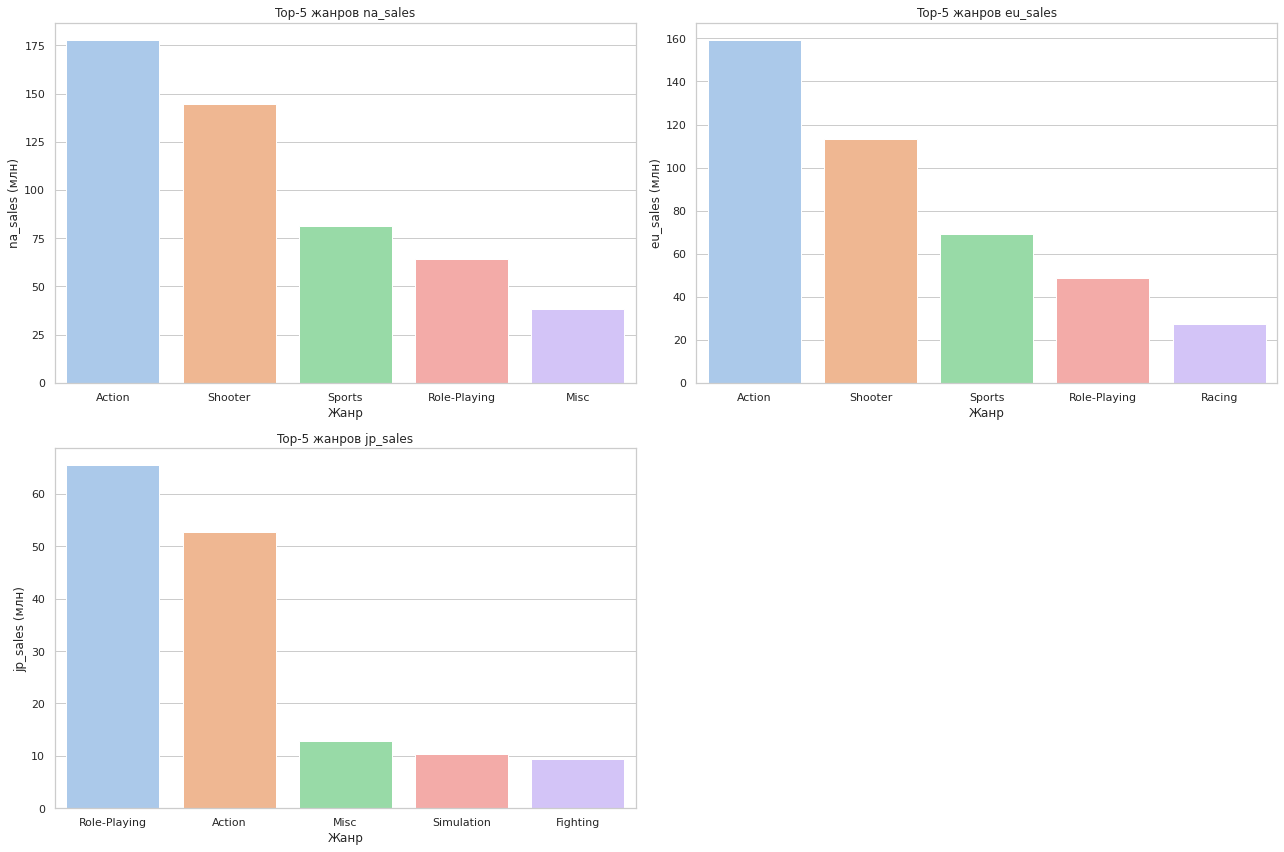

In [40]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

plt.figure(figsize=(18, 12))

for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    
    top_genres = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    
    sns.set(style="whitegrid", palette="pastel")
    
    bar_plot = sns.barplot(x=top_genres.index, y=top_genres.values, palette="pastel")
    
    plt.title(f'Top-5 жанров {region}')
    plt.xlabel('Жанр')
    plt.ylabel(f'{region} (млн)')

plt.tight_layout()
plt.show()


Самыми популярными жанрами для пользователей Европейского союза являются Action, Shooter, Sports, Mics, Role-playing (по убыванию);
Самыми популярными жанрами для пользователей Северной Америки являются Action, Shooter, Sports, Mics, Role-playing (по убыванию);
Самыми популярными жанрами для пользователей Японии являются Role-playing, Action, Mics, Sports, Platform (по убыванию).
Во всех случаях наиболее популярный жанр имеет огромный отрыв от второго по популярности

### Влияние рейтинга ESRB

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

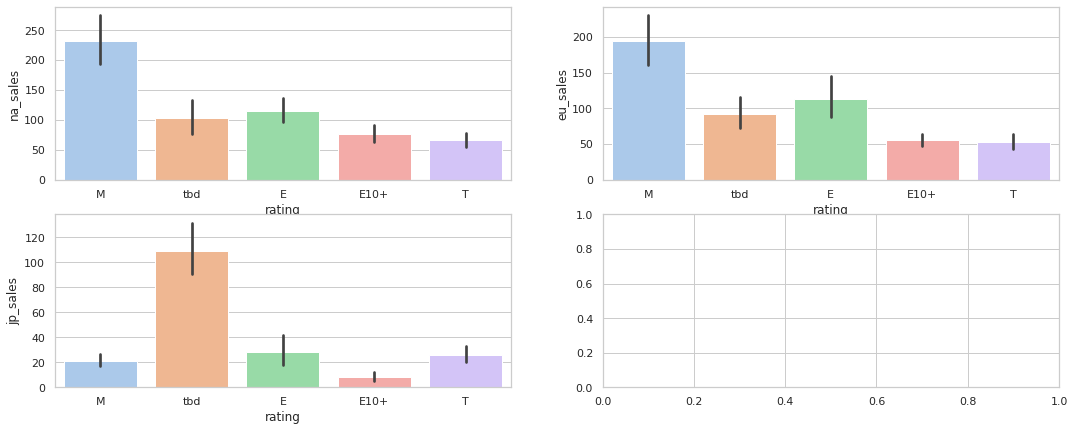

In [41]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
sns.barplot(y='na_sales', x='rating', data = df,estimator=sum, ax=axis[0,0])
sns.barplot(y='eu_sales', x='rating', data = df,estimator=sum, ax=axis[0,1])
sns.barplot(y='jp_sales', x='rating', data = df,estimator=sum, ax=axis[1,0])

Рейтинг ESRB влияет на продажи во всех рассматриваемых регионах, кроме Японии: там наибольшее колиечство продаж у игр, рейтинг которых не известен, так как эта рейтинговая система применяется в США и Канаде, а в Японии есть своя - CERO

## Проверка гипотез

Для проверки статистических гипотез мною выбран двухвыборочный t-критерий, который используется для определения того, равны ли две средние значения генеральной совокупности. Нулевая гипотеза гласит о равенстве средних значений, альтернативная -  о том, что они отличаются. Пороговое значения alpha = 0.05

### H0: средние пользовательские рейтинги платформ Xbox One и PC равны; H1: средние пользовательские рейтинги платформ Xbox One и PC не равны.


In [42]:
valid_df = df[df['user_score'].notna() & (df['user_score'] != -1)]

xbox_one_scores = valid_df[valid_df['platform'] == 'XOne']['user_score']
pc_scores = valid_df[valid_df['platform'] == 'PC']['user_score']

if xbox_one_scores.empty or pc_scores.empty:
    print("Недостаточно данных для проведения t-теста.")
else:
    t_statistic, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)
   
    print(f"T-статистика: {t_statistic}")
    print(f"P-значение: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не удалось отвергнуть нулевую гипотезу")

    xbox_one_mean = xbox_one_scores.mean()
    pc_mean = pc_scores.mean()
    if xbox_one_mean > pc_mean:
        print(f"Средний пользовательский рейтинг Xbox One ({xbox_one_mean}) выше, чем у PC ({pc_mean}).")
    elif xbox_one_mean < pc_mean:
        print(f"Средний пользовательский рейтинг PC ({pc_mean}) выше, чем у Xbox One ({xbox_one_mean}).")
    else:
        print("Средние пользовательские рейтинги Xbox One и PC одинаковы.")

T-статистика: 0.5930304646661255
P-значение: 0.5535080500643661
Не удалось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг Xbox One (6.521428571428572) выше, чем у PC (6.4286407766990274).


### H0: средние пользовательские рейтинги платформ Action и Sports равны; H1: средние пользовательские рейтинги платформ Action и Sports не равны.


In [43]:
valid_df = df[df['user_score'].notna() & (df['user_score'] != -1)]

action_scores = valid_df[valid_df['genre'] == 'Action']['user_score']
sports_scores = valid_df[valid_df['genre'] == 'Sports']['user_score']

if action_scores.empty or sports_scores.empty:
    print("Недостаточно данных для проведения t-теста.")
else:
    t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores)
    
    print(f"T-статистика: {t_statistic}")
    print(f"P-значение: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.")
    else:
        print("Не удалось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковы.")

    action_mean = action_scores.mean()
    sports_mean = sports_scores.mean()
    if action_mean > sports_mean:
        print(f"Средний пользовательский рейтинг Action ({action_mean}) выше, чем у Sports ({sports_mean}).")
    elif action_mean < sports_mean:
        print(f"Средний пользовательский рейтинг Sports ({sports_mean}) выше, чем у Action ({action_mean}).")
    else:
        print("Средние пользовательские рейтинги Action и Sports одинаковы.")

T-статистика: 10.984175532598625
P-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются.
Средний пользовательский рейтинг Action (6.825047801147227) выше, чем у Sports (5.455670103092784).


## Общий вывод

На этапе знакомства с данными была получена общая информация о значениях, содержащихся в таблице. Далее сами значения были обработаны, и после этапа обработки их ожидало дальнейшее преобразование в виде проведения с ними математических операций во имя вычисления новых параметров, характеризующих использование сервисом. Были построенны различные графики и проверены гипотезы. Результаты предоставлены ниже.

    1) рост выпуска видеоигр начался с 1995 года, что объясняется историей этой индустрии. Период, в котором производилось наибольшее количество игр, - 2007-2011 годы, после чего до 2016 наблюдался спад;
    2) актуальный период = отрезок времени с 2012 по 2016 год;
    3) корреляция между отзывами пользователей и продажами игр на платформе не превышает значение в 0.18, что говорит о слабой линейной зависимости между рассматриваемыми параметрами; 
    4) корреляция между отзывами критиков и продажами игр на платформе не превышает значение в 0.43 и не опускается ниже 0.18, что говорит о средней линейной зависимости между рассматриваемыми параметрами, а также о том, что взаимосвязь отзывов критиков и продаж игр на платформе зависит непосредственно от самой платформы.
    5) самым продаваемым жанром является "Action", а самым не популярным среди пользователей - "Strategy";
    6) самыми популярными платформами для пользователей Европейского союза являются PS3, X360, Wii, DS, PS4 (по убыванию); для пользователей Северной Америки - X360, Wii, PS3, DS, PS2 (по убыванию); для пользователей Японии - DS, 3DS, PS3, PSP, Wii (по убыванию). Во всех случаях первая платформа имеет огромный отрыв от второй;
    7) самыми популярными жанрами для пользователей Европейского союза являются Action, Sports, Shooter, Mics, Racing (по убыванию); для пользователей Северной Америки - Action, Sports, Shooter, Mics, Role-playing (по убыванию); для пользователей Японии - Role-playing, Action, Mics, Sports, Platform (по убыванию). Во всех случаях наиболее популярный жанр имеет огромный отрыв от второго по популярности;
    8) рейтинг ESRB влияет на продажи во всех рассматриваемых регионах, кроме Японии: там наибольшее колиечство продаж у игр, рейтинг которых не известен;
    9) с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий;
    10) средние пользовательские рейтинги жанров Action и Sports различаются.
    
На мой взгляд, для более полного исследования также необходимо сообщить ответственным за это лицам об огромном количестве в пропусках в столбцах, являющихся ключевыми для проведения анализа, а также рассмотреть зависимость между продажей каждого жанра и годом продаж. Отделу маркетинга для проведения рекламной кампании я бы рекомендовала обращать внимание на оценку критиков, однако сильно не придавать значения пользовательской оценке. Согласно результатам, в новом году было бы разумным сделать акцент на продаже игр следующих жанров: "Shooter", "Platform", "Sports", "Fighting" и "Racing"; также важную роль может играть рейтинг ESRB (в Северной Америке и Европе)